# Introduction:

In [51]:
#******************************************
# NAME: Jonah Zembower
# Date: February 13, 2025
# Project: EY 2025 Data Science Challenge
#******************************************

This notebook looks into the metadata that was found on New York City through the New York Open Data. Furthermore, I also looked at the census data to understand more of the socioeconomic factors of the city itself along with population factors.

# Importing Libraries and Data:

### Importing necessary libraries that are used.

In [52]:
# Supress Warnings 
import warnings
warnings.filterwarnings('ignore')

# Import common GIS tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import API tools
import requests

# For the elevation data
from scipy.spatial import cKDTree

# For the geodataframe
import geopandas as gpd
from shapely import wkt

### Zip Codes:

Upload the API data for zip codes:

In [53]:
# URL of the API
url = "https://data.cityofnewyork.us/resource/bdha-6eqy.json"

# Send a GET request to the API
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    print("Data successfully retrieved")
else:
    print("Failed to retrieve data")

# Display the first few records
data[:5]

Data successfully retrieved


[{'the_geom': {'type': 'Point',
   'coordinates': [-73.97544509708256, 40.75325543261831]},
  'name': 'Grand Central Station',
  'housenum': '450',
  'streetname': 'LEXINGTON AVENUE',
  'city': 'New York',
  'zip': '10017',
  'url': 'http://www.usps.com/',
  'bin': '1085671',
  'bbl': '1012800090'},
 {'the_geom': {'type': 'Point',
   'coordinates': [-73.99084058306957, 40.757113096402534]},
  'name': 'Port Authority Convenience',
  'housenum': '625',
  'streetname': '8 AVENUE',
  'city': 'New York',
  'zip': '10018',
  'url': 'http://www.usps.com/',
  'bin': '1083268',
  'bbl': '1010320029'},
 {'the_geom': {'type': 'Point',
   'coordinates': [-73.98982153195676, 40.754183189157985]},
  'name': 'Midtown Station',
  'housenum': '223',
  'streetname': 'WEST 38 STREET',
  'city': 'New York',
  'zip': '10018',
  'url': 'http://www.usps.com/',
  'bin': '1014478',
  'bbl': '1007880026'},
 {'the_geom': {'type': 'Point',
   'coordinates': [-73.98646898020364, 40.76383429701581]},
  'name': 'Rad

Upload the CSV version of zip codes for February 13, 2025 for initial EDA:

In [54]:
zip_code = pd.read_csv("C:\\Users\\jrzem\\OneDrive\\Desktop\\EY Dataset\\New York Open Source Data\\POST_OFFICE.csv")

### Shoreline Data:

In [55]:
shoreline = pd.read_csv("C:\\Users\\jrzem\\OneDrive\\Desktop\\EY Dataset\\New York Open Source Data\\NYC_Planimetric_Database__Shoreline_20250225.csv")

### Elevation Data:

elevation = physically recorded data from the NYC open dataset

elevation_2 = arial photography data from the Planimetric NYC Open Data

In [56]:
# Load in the data
elevation = pd.read_csv('C:\\Users\\jrzem\\OneDrive\\Desktop\\EY Dataset\\New York Open Source Data\\Building_Elevation_and_Subgrade__BES__20250225.csv')
elevation_2 = pd.read_csv("C:\\Users\\jrzem\\OneDrive\\Desktop\\EY Dataset\\NYC_Planimetric_Database__Elevation_Points_20250301.csv")

In [57]:
# Pull in the API data
url = 'https://data.cityofnewyork.us/resource/bsin-59hv.json'

# Send a GET request to the API
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    print("Data successfully retrieved")
else:
    print("Failed to retrieve data")

# Display the first few records
data[:5]

Data successfully retrieved


[{'the_geom': {'type': 'Point',
   'coordinates': [-74.21589632195371, 40.54910471095762]},
  'bin': '5117231.0',
  'bbl': '5070487502',
  'borough': '5',
  'block': '7048',
  'lot': '150',
  'z_grade': '65.472',
  'z_floor': '67.204',
  'subgrade': 'N',
  'notes1': 'Property was Successfully Measured',
  'x': '924250.65542',
  'y': '139404.1051',
  'latitude': '40.54910471',
  'longitude': '-74.21589632',
  'pluto_bbl': '5070487502.0',
  'council': '51',
  'borocd': '503',
  'ctlabel': '208.05',
  'boroct2020': '5020805',
  'nta2020': 'SI0303',
  'ntaname': 'Arden Heights-Rossville',
  'cdta2020': 'SI03',
  'cdtaname': 'SI03 South Shore (CD 3 Approximation)',
  ':@computed_region_f5dn_yrer': '15',
  ':@computed_region_yeji_bk3q': '1',
  ':@computed_region_sbqj_enih': '77',
  ':@computed_region_92fq_4b7q': '9'},
 {'the_geom': {'type': 'Point',
   'coordinates': [-74.14989010533327, 40.63085296395724]},
  'bin': '5093502.0',
  'bbl': '5011720224',
  'borough': '5',
  'block': '1172',
  

In [58]:
elevation.head()

the_geom      bin         bbl  borough  \
0  POINT (-74.21589632195371 40.54910471095762)  5117231  5070487502      5.0   
1  POINT (-74.14989010533327 40.63085296395724)  5093502  5011720224      5.0   
2  POINT (-74.03739564973613 40.63155182851029)  3149620  3059560082      3.0   
3  POINT (-74.01028119237117 40.60665011652735)  3167496  3063977501      3.0   
4  POINT (-74.00034122870011 40.61114790077841)  3163289  3062847501      3.0   

    block   lot          address  z_grade  z_floor subgrade  ...  longitude  \
0  7048.0   150              NaN   65.472   67.204        N  ... -74.215896   
1  1172.0   224  36 WALKER DRIVE   29.370   30.300        N  ... -74.149890   
2  5956.0    82      9 78 STREET   28.861   31.301        N  ... -74.037379   
3  6397.0  7501              NaN   22.192   23.393        N  ... -74.010281   
4  6284.0  7501              NaN   33.157   33.525        N  ... -74.000341   

    pluto_bbl Council  BoroCD  CTLabel  BoroCT2020  NTA2020  \
0  5070487502      51     503   208.05     5020805   SI0303   
1  5011720224      49     501   239.00     5023900   SI0107   
2  3059560082      47     310    44.00     3004400   BK1001   
3  3063977501      50     311   180.00     3018000   BK1102   
4  3062847501      38     311   276.00     3027600   BK1101   

                                   NTAName  CDTA2020  \
0                  Arden Heights-Rossville      SI03   
1  Mariner's Harbor-Arlington-Graniteville      SI01   
2                                Bay Ridge      BK10   
3                               Bath Beach      BK11   
4                              Bensonhurst      BK11   

                                            CDTAName  
0              SI03 South Shore (CD 3 Approximation)  
1                 SI01 North Shore (CD 1 Equivalent)  
2  BK10 Bay Ridge-Dyker Heights (CD 10 Approximat...  
3  BK11 Bensonhurst-Bath Beach (CD 11 Approximation)  
4  BK11 Bensonhurst-Bath Beach (CD 11 Approximation)  

[5 rows x 26 columns]

In [59]:
# Extract the existing longitude and latitude values
coords = np.array([(item['longitude'], item['latitude']) for item in data])

# Create a KDTree
tree = cKDTree(coords)

# Query the KDTree to find the nearest neighbors
distances, indices = tree.query(coords, k=1)

# Update the longitude and latitude values
for i, index in enumerate(indices):
    data[i]['longitude'] = coords[index][0]
    data[i]['latitude'] = coords[index][1]

# Display the updated data
data[:5]

[{'the_geom': {'type': 'Point',
   'coordinates': [-74.21589632195371, 40.54910471095762]},
  'bin': '5117231.0',
  'bbl': '5070487502',
  'borough': '5',
  'block': '7048',
  'lot': '150',
  'z_grade': '65.472',
  'z_floor': '67.204',
  'subgrade': 'N',
  'notes1': 'Property was Successfully Measured',
  'x': '924250.65542',
  'y': '139404.1051',
  'latitude': np.str_('40.54910471'),
  'longitude': np.str_('-74.21589632'),
  'pluto_bbl': '5070487502.0',
  'council': '51',
  'borocd': '503',
  'ctlabel': '208.05',
  'boroct2020': '5020805',
  'nta2020': 'SI0303',
  'ntaname': 'Arden Heights-Rossville',
  'cdta2020': 'SI03',
  'cdtaname': 'SI03 South Shore (CD 3 Approximation)',
  ':@computed_region_f5dn_yrer': '15',
  ':@computed_region_yeji_bk3q': '1',
  ':@computed_region_sbqj_enih': '77',
  ':@computed_region_92fq_4b7q': '9'},
 {'the_geom': {'type': 'Point',
   'coordinates': [-74.14989010533327, 40.63085296395724]},
  'bin': '5093502.0',
  'bbl': '5011720224',
  'borough': '5',
  '

### Digital City Map Name:

In [60]:
# Loading in the city map dataset
city_map = pd.read_csv("C:\\Users\\jrzem\\OneDrive\\Desktop\\EY Dataset\\New York Open Source Data\\DCM_StreetNameChanges_Points_20250225.csv")

In [61]:
city_map

the_geom        Borough  \
0      POINT (-74.08912148057911 40.58414256104758)  Staten Island   
1      POINT (-74.01082340300863 40.60670076791827)       Brooklyn   
2      POINT (-73.9834673989941 40.771135766460304)      Manhattan   
3      POINT (-73.95775745966317 40.60098588903353)       Brooklyn   
4      POINT (-74.00987373255226 40.62467900128834)       Brooklyn   
...                                             ...            ...   
1119   POINT (-73.84886886199779 40.68814090860431)            NaN   
1120   POINT (-73.83905987014855 40.68624007019814)         Queens   
1121   POINT (-73.84577280190129 40.64790246685461)         Queens   
1122  POINT (-73.85826364890585 40.678123231557706)         Queens   
1123   POINT (-73.84387143153143 40.57758111066364)         Queens   

              Feat_Type                            OfficialNM  \
0     Intersection name                                   NaN   
1     Intersection name                                   NaN   
2     Intersection name                                   NaN   
3     Intersection name                                   NaN   
4           Corner name                                   NaN   
...                 ...                                   ...   
1119                NaN  Crossing Guard Krystyna Naprawa Lane   
1120                NaN                   Camille Ferraro Way   
1121                NaN                    Karina Vetrano Way   
1122                NaN                    Mary Ann Carey Way   
1123                NaN                    Linda Ruscillo Way   

                                Honor_Name Old_Name ULURPCPNUM  Intro_NUM  \
0                    Vincent S. Chiara Way      NaN       none      471.0   
1                            Rita Blau Way      NaN       none      471.0   
2                     Jerome Robbins Place      NaN       none      471.0   
3                       Luther Mook Corner      NaN       none      471.0   
4       Charles J. Mauro 9/11 Memorial Way      NaN       none      471.0   
...                                    ...      ...        ...        ...   
1119  Crossing Guard Krystyna Naprawa Lane      NaN        NaN     1278.0   
1120                   Camille Ferraro Way      NaN        NaN     1278.0   
1121                    Karina Vetrano Way      NaN        NaN     1278.0   
1122                    Mary Ann Carey Way      NaN        NaN     1278.0   
1123                    Linda Ruscillo Way      NaN        NaN     1278.0   

      Intro_Year  IntroMonth  ...   LL_Type  LLEffectDT  \
0           2004          10  ...  Honorary  12/21/2004   
1           2004          10  ...  Honorary  12/21/2004   
2           2004          10  ...  Honorary  12/21/2004   
3           2004          10  ...  Honorary  12/21/2004   
4           2004          10  ...  Honorary  12/21/2004   
...          ...         ...  ...       ...         ...   
1119        2023           0  ...       NaN         NaN   
1120        2023           0  ...       NaN  12/20/2023   
1121        2023           0  ...       NaN  12/20/2023   
1122        2023           0  ...       NaN  12/20/2023   
1123        2023           0  ...       NaN  12/20/2023   

                                              LL_Limits Limits_ER Repealed  \
0     the intersection of Liberty Avenue and Mason A...       NaN       No   
1       the intersection of 16th Avenue and Bath Avenue       NaN       No   
2     the intersection of West 62nd Street and Colum...       NaN       No   
3     the intersection of Avenue T and East 14th Street       NaN       No   
4     the northeast corner of the intersection of 72...       NaN       No   
...                                                 ...       ...      ...   
1119  At the intersection of Atlantic Avenue and Woo...       NaN      NaN   
1120  At the intersection of 104th Street and 101st ...       NaN      NaN   
1121  At the intersection of 165th Avenue and 84th S...       NaN      NaN   
1122  A

### Socioeconomic Data:

In [62]:
# Demographic data
bronx_boroughs = pd.read_excel("C:\\Users\\jrzem\\OneDrive\\Desktop\\EY Dataset\\demo_2016acs5yr_nyc.xlsx", sheet_name="Bronx")
manhattan_boroughs = pd.read_excel("C:\\Users\\jrzem\\OneDrive\\Desktop\\EY Dataset\\demo_2016acs5yr_nyc.xlsx", sheet_name="Manhattan")

In [63]:
# Census economic data
economic_bronx = pd.read_excel("C:\\Users\\jrzem\\OneDrive\\Desktop\\EY Dataset\\ACSDP1Y2023.DP03-2025-03-06T171052.xlsx", sheet_name="Bronx")
economic_manhattan = pd.read_excel("C:\\Users\\jrzem\\OneDrive\\Desktop\\EY Dataset\\ACSDP1Y2023.DP03-2025-03-06T171052.xlsx", sheet_name="Manhattan")

In [64]:
bronx_boroughs

Unnamed: 0   Estimate
0                           SEX AND AGE        NaN
1                      Total population  1,436,785
2                                  Male    676,440
3                                Female    760,345
4                                   NaN        NaN
..                                  ...        ...
95                                  NaN        NaN
96       CITIZEN, VOTING AGE POPULATION        NaN
97      Citizen, 18 and over population    830,543
98                                 Male    371,623
99                               Female    458,920

[100 rows x 2 columns]

In [65]:
manhattan_boroughs

Unnamed: 0   Estimate
0                           SEX AND AGE        NaN
1                      Total population  1,634,989
2                                  Male    773,232
3                                Female    861,757
4                                   NaN        NaN
..                                  ...        ...
95                                  NaN        NaN
96       CITIZEN, VOTING AGE POPULATION        NaN
97      Citizen, 18 and over population  1,165,063
98                                 Male    537,317
99                               Female    627,746

[100 rows x 2 columns]

I have to clean the Bronx and Manhattan datasets to make them more efficient for analysis.

In [66]:
# Drop missing values
economic_bronx.dropna(inplace=True)
economic_manhattan.dropna(inplace=True)

# Remove any spaces from the first and second columns
economic_bronx.columns = economic_bronx.columns.str.strip()
economic_manhattan.columns = economic_manhattan.columns.str.strip()

economic_bronx['Group'] = economic_bronx['Group'].str.strip()
economic_manhattan['Group'] = economic_manhattan['Group'].str.strip()

In [67]:
# Drop missing values
bronx_boroughs.dropna(inplace=True)
manhattan_boroughs.dropna(inplace=True)

# Remove any spaces from the first and second columns
bronx_boroughs.columns = bronx_boroughs.columns.str.strip()
manhattan_boroughs.columns = manhattan_boroughs.columns.str.strip()

bronx_boroughs['Unnamed: 0'] = bronx_boroughs['Unnamed: 0'].str.strip()
manhattan_boroughs['Unnamed: 0'] = manhattan_boroughs['Unnamed: 0'].str.strip()

In [68]:
# Remove commas and convert the 'Estimate' column to float values
bronx_boroughs['Estimate'] = bronx_boroughs['Estimate'].str.replace(',', '').astype(float)
manhattan_boroughs['Estimate'] = manhattan_boroughs['Estimate'].str.replace(',', '').astype(float)

### Things to Look For:

1. Computed difference between each zip code data location and shoreline. This could be made into its own csv that is put in our model.
2. Elevation differences for the model. 
3. Assess the wind tunnels.

Are current datasets are:
1. zip_code
2. shoreline
3. elevation
4. city_map

In [69]:
# The region that is boudning the city into the bronx and manhattan locations
lower_left = (40.75, -74.01)
upper_right = (40.88, -73.86)
# bounds = (min_lon, min_lat, max_lon, max_lat)
bounds = (lower_left[1], lower_left[0], upper_right[1], upper_right[0])

# EDA:

### Train Stations:

Plot the initial zip code data to see where the stations are located in New York.

In [70]:
zip_code

the_geom  \
0     POINT (-73.97544509708256 40.75325543261831)   
1    POINT (-73.99084058306957 40.757113096402534)   
2    POINT (-73.98982153195676 40.754183189157985)   
3     POINT (-73.98646898020364 40.76383429701581)   
4     POINT (-73.97801774312154 40.75827112445771)   
..                                             ...   
225   POINT (-73.82222227351653 40.88250321258738)   
226   POINT (-74.00626796784483 40.72832732285241)   
227   POINT (-73.98017943308466 40.74687198765772)   
228   POINT (-73.97085994315773 40.74797909931564)   
229    POINT (-73.9690969838129 40.74879628955857)   

                           NAME HOUSENUM        STREETNAME      CITY    ZIP  \
0         Grand Central Station      450  LEXINGTON AVENUE  New York  10017   
1    Port Authority Convenience      625          8 AVENUE  New York  10018   
2               Midtown Station      223    WEST 38 STREET  New York  10018   
3            Radio City Station      322    WEST 52 STREET  New York  10019   
4            Rockefeller Center      610          5 AVENUE  New York  10020   
..                          ...      ...               ...       ...    ...   
225                  Co-Op City     3300     CONNER STREET     Bronx  10475   
226             Village Station      201     VARICK STREET  New York  10014   
227         Murray Hill Finance      115    EAST 34 STREET  New York  10016   
228          Tudor City Station        5  TUDOR CITY PLACE  New York  10017   
229      United Nations Station      405    EAST 42 STREET  New York  10017   

                      URL      BIN           BBL  
0    http://www.usps.com/  1085671  1.012800e+09  
1    http://www.usps.com/  1083268  1.010320e+09  
2    http://www.usps.com/  1014478  1.007880e+09  
3    http://www.usps.com/  1025213  1.010420e+09  
4    http://www.usps.com/  1082656  1.012650e+09  
..                    ...      ...           ...  
225  http://www.usps.com/  2072448  2.052550e+09  
226  http://www.usps.com/  1009755  1.005810e+09  
227  http://www.usps.com/  1018517  1.008900e+09  
228  http://www.usps.com/  1038647  1.013330e+09  
229  http://www.usps.com/  1083874  1.013540e+09  

[230 rows x 9 columns]

In [71]:
# Define the bounding box
min_lat, min_lon = lower_left
max_lat, max_lon = upper_right

# Convert the_geom to a GeoDataFrame
zip_code['geometry'] = zip_code['the_geom'].apply(wkt.loads)
gdf_geometry = gpd.GeoDataFrame(zip_code, geometry='geometry')

# Filter the zip_code data points within the bounding box
filtered_zip_code = zip_code[
    (zip_code['geometry'].apply(lambda geom: geom.y) >= min_lat) &
    (zip_code['geometry'].apply(lambda geom: geom.y) <= max_lat) &
    (zip_code['geometry'].apply(lambda geom: geom.x) >= min_lon) &
    (zip_code['geometry'].apply(lambda geom: geom.x) <= max_lon)
]

# Display the filtered data
filtered_zip_code

the_geom  \
0     POINT (-73.97544509708256 40.75325543261831)   
1    POINT (-73.99084058306957 40.757113096402534)   
2    POINT (-73.98982153195676 40.754183189157985)   
3     POINT (-73.98646898020364 40.76383429701581)   
4     POINT (-73.97801774312154 40.75827112445771)   
..                                             ...   
211   POINT (-73.86539585655014 40.87744298970349)   
212   POINT (-73.89977418790245 40.86497466709893)   
219   POINT (-73.87111585096633 40.82944929040729)   
220   POINT (-73.86767604818434 40.82212402126996)   
222   POINT (-73.88881264314821 40.81702690733944)   

                           NAME HOUSENUM          STREETNAME      CITY    ZIP  \
0         Grand Central Station      450    LEXINGTON AVENUE  New York  10017   
1    Port Authority Convenience      625            8 AVENUE  New York  10018   
2               Midtown Station      223      WEST 38 STREET  New York  10018   
3            Radio City Station      322      WEST 52 STREET  New York  10019   
4            Rockefeller Center      610            5 AVENUE  New York  10020   
..                          ...      ...                 ...       ...    ...   
211              Williamsbridge      711  EAST GUN HILL ROAD     Bronx  10467   
212             Jerome  Station     2549       JEROME AVENUE     Bronx  10468   
219                   Soundview     1687      GLEASON AVENUE     Bronx  10472   
220                Clason Point      829    SOUNDVIEW AVENUE     Bronx  10473   
222                 Hunts Point      800       MANIDA STREET     Bronx  10474   

                      URL      BIN           BBL  \
0    http://www.usps.com/  1085671  1.012800e+09   
1    http://www.usps.com/  1083268  1.010320e+09   
2    http://www.usps.com/  1014478  1.007880e+09   
3    http://www.usps.com/  1025213  1.010420e+09   
4    http://www.usps.com/  1082656  1.012650e+09   
..                    ...      ...           ...   
211  http://www.usps.com/  2057675  2.046570e+09   
212  http://www.usps.com/  2014379  2.032010e+09   
219  http://www.usps.com/  2024084  2.037480e+09   
220  http://www.usps.com/  2022547  2.036360e+09   
222  http://www.usps.com/  2102159  2.027400e+09   

                                          geometry  
0     POINT (-73.97544509708256 40.75325543261831)  
1    POINT (-73.99084058306957 40.757113096402534)  
2    POINT (-73.98982153195676 40.754183189157985)  
3     POINT (-73.98646898020364 40.76383429701581)  
4     POINT (-73.97801774312154 40.75827112445771)  
..                                             ...  
211   POINT (-73.86539585655014 40.87744298970349)  
212   POINT (-73.89977418790245 40.86497466709893)  
219   POINT (-73.87111585096633 40.82944929040729)  
220   POINT (-73.86767604818434 40.82212402126996)  
222   POINT (-73.88881264314821 40.81702690733944)  

[78 rows x 10 columns]

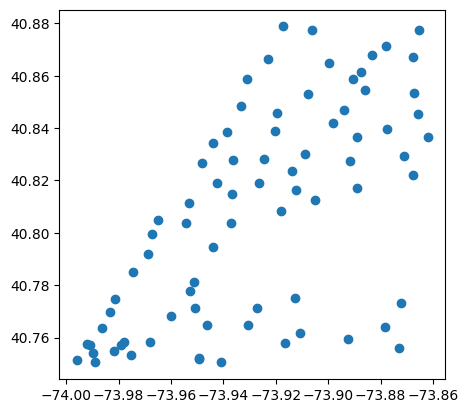

In [72]:
# Convert the_geom to a GeoDataFrame
filtered_zip_code['geometry'] = filtered_zip_code['the_geom'].apply(wkt.loads)
gdf_geometry = gpd.GeoDataFrame(filtered_zip_code, geometry='geometry')

# Plot the GeoDataFrame
gdf_geometry.plot()
plt.show()

### Shoreline Data:

Showcase the shoreline data and where it is all located on a map.

In [73]:
shoreline

the_geom    SOURCE_ID  SUB_CODE  \
0    MULTILINESTRING ((-73.91630337846249 40.632089...  20390000015    390000   
1    MULTILINESTRING ((-73.87053731384084 40.644791...   2390000081    390000   
2    MULTILINESTRING ((-73.86129142220572 40.655853...            0    390000   
3    MULTILINESTRING ((-73.83827281979798 40.655101...   4390000002    390000   
4    MULTILINESTRING ((-73.8571369208228 40.6521490...            0    390000   
..                                                 ...          ...       ...   
408  MULTILINESTRING ((-73.88779777774792 40.773713...  10390000021    390000   
409  MULTILINESTRING ((-73.96175786511668 40.734909...  10390000007    390000   
410  MULTILINESTRING ((-73.99336817568008 40.583237...   2390000052    390000   
411  MULTILINESTRING ((-73.99739976512805 40.586935...   2390000052    390000   
412  MULTILINESTRING ((-74.19420290055783 40.617348...  16390000122    390000   

     FEAT_CODE     STATUS     SHAPE_Leng  
0         3900  Unchanged   16892.794111  
1         3900    Updated   21285.791726  
2         3900        New    2138.228931  
3         3900    Updated   17535.146015  
4         3900        New     269.911808  
..         ...        ...            ...  
408       3900  Unchanged    1928.796472  
409       3900    Updated    4952.731300  
410       3900    Updated  218661.451191  
411       3900    Updated    4624.772970  
412       3900    Updated    2097.487983  

[413 rows x 6 columns]

In [74]:
# Convert the_geom to a GeoDataFrame
shoreline['geometry'] = shoreline['the_geom'].apply(wkt.loads)
gdf_geometry = gpd.GeoDataFrame(shoreline, geometry='geometry')

# Filter the shoreline data points within the bounding box
filtered_shoreline = shoreline[
    (shoreline['geometry'].apply(lambda geom: geom.bounds[1]) >= min_lat) &
    (shoreline['geometry'].apply(lambda geom: geom.bounds[3]) <= max_lat) &
    (shoreline['geometry'].apply(lambda geom: geom.bounds[0]) >= min_lon) &
    (shoreline['geometry'].apply(lambda geom: geom.bounds[2]) <= max_lon)
]

# Display the filtered data
filtered_shoreline

the_geom    SOURCE_ID  SUB_CODE  \
35   MULTILINESTRING ((-73.87255325549617 40.780827...  10390000026    390000   
56   MULTILINESTRING ((-73.87073923299542 40.779737...  10390000025    390000   
61   MULTILINESTRING ((-73.92718558293264 40.791932...  13390000021    390000   
62   MULTILINESTRING ((-73.94965293833081 40.767535...  12390000012    390000   
88   MULTILINESTRING ((-73.92730531666427 40.791744...  13390000020    390000   
..                                                 ...          ...       ...   
401  MULTILINESTRING ((-73.88511364819935 40.779516...  10390000019    390000   
403  MULTILINESTRING ((-73.9018576365961 40.7813593...  10390000006    390000   
406  MULTILINESTRING ((-73.88500441965328 40.779576...  10390000017    390000   
407  MULTILINESTRING ((-73.90228748822105 40.780208...  10390000024    390000   
408  MULTILINESTRING ((-73.88779777774792 40.773713...  10390000021    390000   

     FEAT_CODE     STATUS   SHAPE_Leng  \
35        3900    Updated  7308.466279   
56        3900  Unchanged   787.072013   
61        3900  Unchanged    76.506265   
62        3900  Unchanged   394.969195   
88        3900  Unchanged   628.907015   
..         ...        ...          ...   
401       3900  Unchanged   849.666797   
403       3900  Unchanged  6316.619267   
406       3900  Unchanged  1989.431293   
407       3900  Unchanged   453.607756   
408       3900  Unchanged  1928.796472   

                                              geometry  
35   MULTILINESTRING ((-73.87255325549617 40.780827...  
56   MULTILINESTRING ((-73.87073923299542 40.779737...  
61   MULTILINESTRING ((-73.92718558293264 40.791932...  
62   MULTILINESTRING ((-73.94965293833081 40.767535...  
88   MULTILINESTRING ((-73.92730531666427 40.791744...  
..                                                 ...  
401  MULTILINESTRING ((-73.88511364819935 40.779516...  
403  MULTILINESTRING ((-73.9018576365961 40.7813593...  
406  MULTILINESTRING ((-73.88500441965328 40.779576...  
407  MULTILINESTRING ((-73.90228748822105 40.780208...  
408  MULTILINESTRING ((-73.88779777774792 40.773713...  

[73 rows x 7 columns]

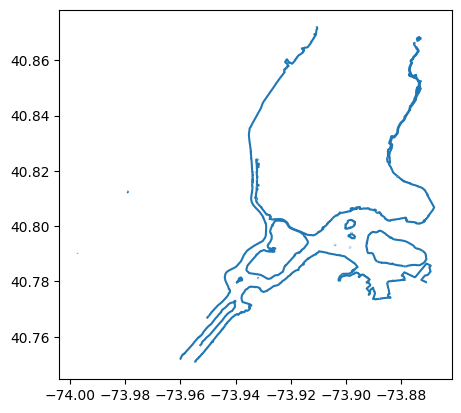

In [75]:
# Convert the_geom to a GeoDataFrame
filtered_shoreline['geometry'] = filtered_shoreline['the_geom'].apply(wkt.loads)
gdf_shoreline = gpd.GeoDataFrame(filtered_shoreline, geometry='geometry')

# Plot the GeoDataFrame
gdf_shoreline.plot()
plt.show()

### Building Elevation:

Using the longitude and latitude, create a contour map that showcases the density of elevation in different areas.

In [77]:
elevation

the_geom      bin         bbl  \
0        POINT (-74.21589632195371 40.54910471095762)  5117231  5070487502   
1        POINT (-74.14989010533327 40.63085296395724)  5093502  5011720224   
2        POINT (-74.03739564973613 40.63155182851029)  3149620  3059560082   
3        POINT (-74.01028119237117 40.60665011652735)  3167496  3063977501   
4        POINT (-74.00034122870011 40.61114790077841)  3163289  3062847501   
...                                               ...      ...         ...   
861871  POINT (-73.83595289766446 40.890787400438136)  2066902  2049620022   
861872   POINT (-73.81885703676222 40.88706908846195)  2083027  2056540312   
861873     POINT (-73.8359093002875 40.8786085841851)  2072400  2052270040   
861874  POINT (-73.83056080435648 40.889656359433204)  2117237  2049700134   
861875  POINT (-73.82673255537071 40.886862069131475)  2066562  2049530124   

        borough   block   lot                address  z_grade  z_floor  \
0           5.0  7048.0   150                    NaN   65.472   67.204   
1           5.0  1172.0   224        36 WALKER DRIVE   29.370   30.300   
2           3.0  5956.0    82            9 78 STREET   28.861   31.301   
3           3.0  6397.0  7501                    NaN   22.192   23.393   
4           3.0  6284.0  7501                    NaN   33.157   33.525   
...         ...     ...   ...                    ...      ...      ...   
861871      2.0  4962.0    22   3956 AMUNDSON AVENUE  135.697  139.435   
861872      2.0  5654.0   312   3444 HUGUENOT AVENUE   13.339   17.567   
861873      2.0  5227.0    40  3340 DE REIMER AVENUE   36.929   39.229   
861874      2.0  4970.0   134   3915 ROMBOUTS AVENUE   71.139   75.471   
861875      2.0  4953.0   124       4139 BOSTON ROAD    0.000    0.000   

       subgrade  ...  longitude   pluto_bbl Council  BoroCD  CTLabel  \
0             N  ... -74.215896  5070487502      51     503   208.05   
1             N  ... -74.149890  5011720224      49     501   239.00   
2             N  ... -74.037379  3059560082      47     310    44.00   
3             N  ... -74.010281  3063977501      50     311   180.00   
4             N  ... -74.000341  3062847501      38     311   276.00   
...         ...  ...        ...         ...     ...     ...      ...   
861871        Y  ... -73.835953  2049620022      12     212   456.00   
861872        Y  ... -73.818857  2056540312      13     212   456.00   
861873        N  ... -73.835909  2052270040      12     212   462.08   
861874        Y  ... -73.830561  2049700134      12     212   456.00   
861875        N  ... -73.826733  2049530124      12     212   484.01   

        BoroCT2020  NTA2020                                  NTAName  \
0          5020805   SI0303                  Arden Heights-Rossville   
1          5023900   SI0107  Mariner's Harbor-Arlington-Graniteville   
2          3004400   BK1001                                Bay Ridge   
3          3018000   BK1102                               Bath Beach   
4          3027600   BK1101                              Bensonhurst   
...            ...      ...                                      ...   
861871     2045600   BX1202          Eastchester-Edenwald-Baychester   
861872     2045600   BX1202          Eastchester-Edenwald-Baychester   
861873     2046208   BX1202          Eastchester-Edenwald-Baychester   
861874     2045600   BX1202          Eastchester-Edenwald-Baychester   
861875     2048401   BX1202          Eastchester-Edenwald-Baychester   

        CDTA2020                                           CDTAName  
0           SI03              SI03 South Shore (CD 3 Approximation)  
1           SI01                 SI01 North Shore (CD 1 Equivalent)  
2           BK10  BK10 Bay Ridge-Dyker Heights (CD 10 Approximat...  
3           BK11  BK11 Bensonhurst-Bath Beach (CD 11 Approximation)  
4           BK11  BK11 Bensonhurst-Bath Beach (CD 11 Approximation)  
...          ...                                                ...  

In [78]:
# Convert the elevation_2['Elevation'] column to meters instead of feet
elevation['z_grade'] = elevation['z_grade'] * 0.328084

In [79]:
# Convert the_geom to a GeoDataFrame
elevation['geometry'] = elevation['the_geom'].apply(wkt.loads)
gdf_geometry = gpd.GeoDataFrame(elevation, geometry='geometry')

# Filter the elevation data points within the bounding box
filtered_elevation = elevation[
    (elevation['latitude'] >= min_lat) &
    (elevation['latitude'] <= max_lat) &
    (elevation['longitude'] >= min_lon) &
    (elevation['longitude'] <= max_lon)
]

# Display the filtered data
filtered_elevation

the_geom      bin         bbl  \
25       POINT (-73.93030953755036 40.75433737281967)  4004543  4003740018   
26       POINT (-73.9265556011626 40.756115030350735)  4009582  4006380012   
29      POINT (-73.94487656293961 40.809825413524884)  1076640  1019120139   
30      POINT (-73.94119794139434 40.808670564065395)  1089812  1017260132   
33       POINT (-73.91190559445964 40.82251364884388)  2113740  2023817501   
...                                               ...      ...         ...   
859269   POINT (-74.00080856140677 40.76473891302583)  1027183  1011070030   
860097  POINT (-73.94266224656852 40.778328388514616)  1090018  1015870027   
860603  POINT (-74.00385556448057 40.760587481455026)  1088426  1006650019   
861057  POINT (-73.94272995751177 40.778482786303975)  1090019  1015870027   
861567  POINT (-74.00393061150268 40.759496214056846)  1089469  1006650011   

        borough   block  lot              address    z_grade  z_floor  \
25          4.0   374.0   18      32-02 32 STREET  13.840880   43.780   
26          4.0   638.0   12      35-29 34 STREET  14.684056   48.126   
29          1.0  1912.0  139  112 WEST 128 STREET   8.923229   27.509   
30          1.0  1726.0  132    3 WEST 128 STREET   7.995735   24.867   
33          2.0  2381.0   56                  NaN   9.902231   30.811   
...         ...     ...  ...                  ...        ...      ...   
859269      1.0  1107.0   30       WEST 46 STREET   0.000000    0.000   
860097      1.0  1587.0   27     1740 YORK AVENUE   0.000000    0.000   
860603      1.0   665.0   19        451 12 AVENUE   0.000000    0.000   
861057      1.0  1587.0   27     1740 YORK AVENUE   0.000000    0.000   
861567      1.0   665.0   11            12 AVENUE   2.267060    7.064   

       subgrade  ...   pluto_bbl Council BoroCD  CTLabel  BoroCT2020  NTA2020  \
25            N  ...  4003740018      26    401    55.00     4005500   QN0105   
26            N  ...  4006380012      26    401    57.00     4005700   QN0103   
29            N  ...  1019120139       9    110   224.00     1022400   MN1002   
30            N  ...  1017260132       9    110   208.00     1020800   MN1002   
33            N  ...  2023817501      17    203   141.00     2014100   BX0301   
...         ...  ...         ...     ...    ...      ...         ...      ...   
859269        N  ...  1011070030       3    104   129.01     1012901   MN0402   
860097        N  ...  1015870027       5    108   152.00     1015200   MN0803   
860603        N  ...  1006650019       3    104   117.00     1011700   MN0401   
861057        N  ...  1015870027       5    108   152.00     1015200   MN0803   
861567        N  ...  1006650011       3    104    99.03     1009903   MN0401   

                                    NTAName  CDTA2020  \
25      Queensbridge-Ravenswood-Dutch Kills      QN01   
26                        Astoria (Central)      QN01   
29                           Harlem (North)      MN10   
30                           Harlem (North)      MN10   
33                               Morrisania      BX03   
...                                     ...       ...   
859269                       Hell's Kitchen      MN04   
860097            Upper East Side-Yorkville      MN08   
860603                 Chelsea-Hudson Yards      MN04   
861057            Upper East Side-Yorkville      MN08   
861567                 Chelsea-Hudson Yards      MN04   

                                                 CDTAName  \
25            QN01 Astoria-Queensbridge (CD 1 Equivalent)   
26            QN01 Astoria-Queensbridge (CD 1 Equivalent)   
29                         MN10 Harlem (CD 10 Equivalent)   
30                         MN10 Harlem (CD 10 Equivalent)   
33      BX03 Morrisania-Crotona Park East (CD 3 Approx...   
...                                                   ...   
859269   MN04 Chelsea-Hell's Kitchen (CD 4 Approximation)   
860097  MN08 Upper East Side-Roosevelt Island (CD 8 Eq...   
860603   MN04 Chelsea-He

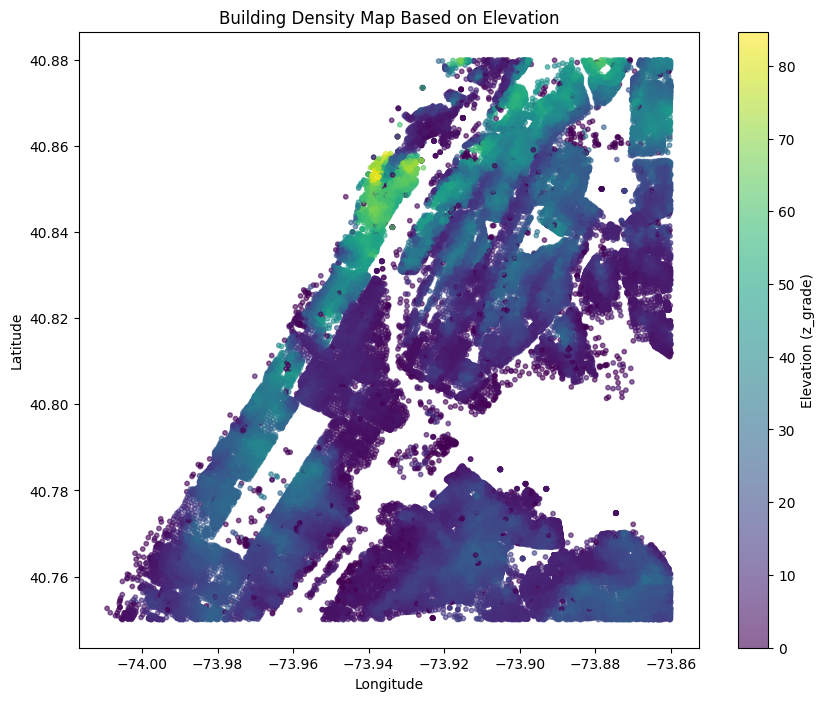

In [80]:
# Extract the longitude, latitude, and z_grade columns
longitude = filtered_elevation['longitude']
latitude = filtered_elevation['latitude']
z_grade = filtered_elevation['z_grade']

# Create a scatter plot with a color map based on z_grade
plt.figure(figsize=(10, 8))
plt.scatter(longitude, latitude, c=z_grade, cmap='viridis', s=10, alpha=0.6)
plt.colorbar(label='Elevation (z_grade)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Building Density Map Based on Elevation')
plt.show()

Here we can see different areas of greater elevation than others. We could potentially compute the distance from shoreline to those that are larger values. There are different feat codes that relate to the dataset differently in terms of elevation. We will first showcase it all together then split it up more. 

In [81]:
elevation_2

the_geom  FEAT_CODE   ELEVATION  \
0          POINT (-73.91097800852549 40.6195288342739)       3000    8.916312   
1         POINT (-73.89955264912054 40.61951941880788)       3000    7.617787   
2        POINT (-73.85313877116351 40.653805773290195)       3000    8.680600   
3        POINT (-73.85313578068859 40.655164756986835)       3000    8.831100   
4        POINT (-73.85313114135936 40.657272098605446)       3000    8.672700   
...                                                ...        ...         ...   
1471850   POINT (-74.01547000189105 40.71314798060661)       3020  142.480000   
1471851  POINT (-73.98869073425045 40.691645858933036)       3020  316.371528   
1471852   POINT (-73.99644539830848 40.71472727902662)       3020  214.916000   
1471853   POINT (-73.99572143309229 40.71488736513624)       3020   81.433000   
1471854   POINT (-74.01223050429324 40.71524254967621)       3020   74.747000   

          SOURCE_ID  SUB_CODE     STATUS  
0        2300028231    300000  Unchanged  
1        2300031473    300000  Unchanged  
2        4300002677    300000  Unchanged  
3        4300003349    300000  Unchanged  
4        4300004431    300000  Unchanged  
...             ...       ...        ...  
1471850           0    302000        New  
1471851           0    302000        New  
1471852           0    302000        New  
1471853           0    302000        New  
1471854           0    302000        New  

[1471855 rows x 6 columns]

In [82]:
# Convert the_geom to a GeoDataFrame
elevation_2['geometry'] = elevation_2['the_geom'].apply(wkt.loads)
gdf_geometry = gpd.GeoDataFrame(elevation_2, geometry='geometry')

# Filter the elevation_2 data points within the bounding box
filtered_elevation_2 = elevation_2[
    (elevation_2['geometry'].apply(lambda geom: geom.y) >= min_lat) &
    (elevation_2['geometry'].apply(lambda geom: geom.y) <= max_lat) &
    (elevation_2['geometry'].apply(lambda geom: geom.x) >= min_lon) &
    (elevation_2['geometry'].apply(lambda geom: geom.x) <= max_lon)
]

# Display the filtered data
filtered_elevation_2

the_geom  FEAT_CODE   ELEVATION  \
165238    POINT (-73.8626183051479 40.756719873124595)       3000   67.449300   
165245     POINT (-73.8705356421596 40.75677129042423)       3020  129.418414   
165253     POINT (-73.86079825075535 40.7567283735753)       3000   62.712533   
165263    POINT (-73.86005876605635 40.75673998474767)       3020   68.500000   
165279    POINT (-73.86150760211845 40.75675342876783)       3020  107.820000   
...                                                ...        ...         ...   
1463176    POINT (-73.87310745275488 40.7740076273949)       3020   54.955273   
1463177  POINT (-73.94920107961813 40.753868900805145)       3020   17.115440   
1463178  POINT (-73.86302674465158 40.751567925884544)       3020   67.022922   
1463179   POINT (-73.8766483066541 40.752067811643904)       3020   87.151161   
1463183    POINT (-73.8734872201288 40.76676612345262)       3020   70.150000   

           SOURCE_ID  SUB_CODE     STATUS  \
165238    9300071219    300000  Unchanged   
165245    9302079783    302000  Unchanged   
165253   11300000164    300000  Unchanged   
165263   11302000174    302000  Unchanged   
165279   11302000190    302000  Unchanged   
...              ...       ...        ...   
1463176  10302066892    302000        New   
1463177            0    302000        New   
1463178            0    302000        New   
1463179            0    302000        New   
1463183            0    302000        New   

                                              geometry  
165238    POINT (-73.8626183051479 40.756719873124595)  
165245     POINT (-73.8705356421596 40.75677129042423)  
165253     POINT (-73.86079825075535 40.7567283735753)  
165263    POINT (-73.86005876605635 40.75673998474767)  
165279    POINT (-73.86150760211845 40.75675342876783)  
...                                                ...  
1463176    POINT (-73.87310745275488 40.7740076273949)  
1463177  POINT (-73.94920107961813 40.753868900805145)  
1463178  POINT (-73.86302674465158 40.751567925884544)  
1463179   POINT (-73.8766483066541 40.752067811643904)  
1463183    POINT (-73.8734872201288 40.76676612345262)  

[178780 rows x 7 columns]

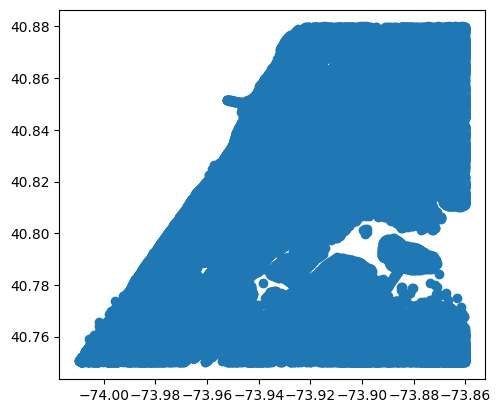

In [83]:
# Convert the_geom to a GeoDataFrame
filtered_elevation_2['geometry'] = filtered_elevation_2['the_geom'].apply(wkt.loads)
gdf_geometry = gpd.GeoDataFrame(filtered_elevation_2, geometry='geometry')

# Plot the GeoDataFrame
gdf_geometry.plot()
plt.show()

Showcases all the elevation points on one map:

In [84]:
# Convert the elevation_2['Elevation'] column to meters instead of feet
filtered_elevation_2['ELEVATION'] = filtered_elevation_2['ELEVATION'] * 0.328084

In [85]:
# Extract coordinates from filtered_elevation and filtered_elevation_2_building
coords_elevation = np.array(list(zip(filtered_elevation['longitude'], filtered_elevation['latitude'])))
coords_elevation_2 = np.array(list(zip(filtered_elevation_2['geometry'].apply(lambda geom: geom.x), filtered_elevation_2['geometry'].apply(lambda geom: geom.y))))

# Create a KDTree for filtered_elevation_2_building
tree_elevation_2 = cKDTree(coords_elevation_2)

# Query the KDTree to find the nearest neighbors in filtered_elevation_2_building for each point in filtered_elevation
distances, indices = tree_elevation_2.query(coords_elevation, k=1)

# Compute the difference in elevation
elevation_difference = filtered_elevation_2.iloc[indices]['ELEVATION'].values - filtered_elevation['z_grade'].values

# Create a new dataframe with the required columns
elevation_df = pd.DataFrame({
    'longitude': filtered_elevation['longitude'],
    'latitude': filtered_elevation['latitude'],
    'z_grade': filtered_elevation['z_grade'],
    'Total Elevation': filtered_elevation_2['ELEVATION'].values[indices],
    'Actual Elevation': elevation_difference,
    'Feat_Code': filtered_elevation_2.iloc[indices]['FEAT_CODE'].values
})

# Display the new dataframe
elevation_df.head()

longitude   latitude    z_grade  Total Elevation  Actual Elevation  \
25 -73.930310  40.754337  13.840880        25.827324         11.986444   
26 -73.926556  40.756115  14.684056        24.318522          9.634467   
29 -73.944877  40.809825   8.923229        22.087472         13.164243   
30 -73.941198  40.808671   7.995735        28.066493         20.070757   
33 -73.911906  40.822514   9.902231        43.235523         33.333292   

    Feat_Code  
25       3020  
26       3020  
29       3020  
30       3020  
33       3020

Compute the elevation_df instances first and then look at the total elevation:

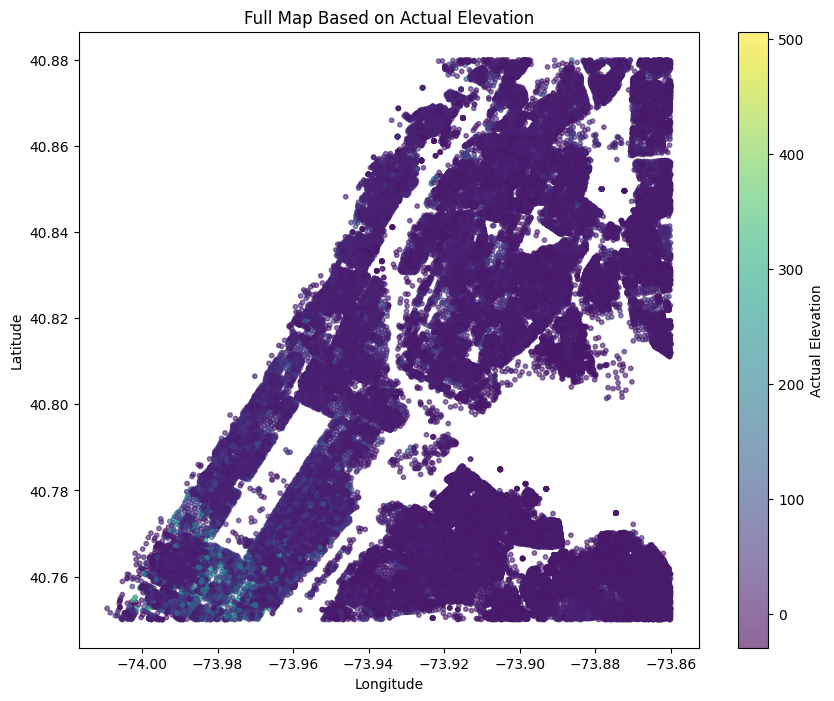

In [86]:
# Extract the longitude, latitude, and Actual Elevation columns
longitude = elevation_df['longitude']
latitude = elevation_df['latitude']
actual_elevation = elevation_df['Actual Elevation']

# Create a scatter plot with a color map based on Actual Elevation
plt.figure(figsize=(10, 8))
plt.scatter(longitude, latitude, c=actual_elevation, cmap='viridis', s=10, alpha=0.6)
plt.colorbar(label='Actual Elevation')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Full Map Based on Actual Elevation')
plt.show()

In [87]:
elevation_df_building = elevation_df[elevation_df['Feat_Code'] == 3020]

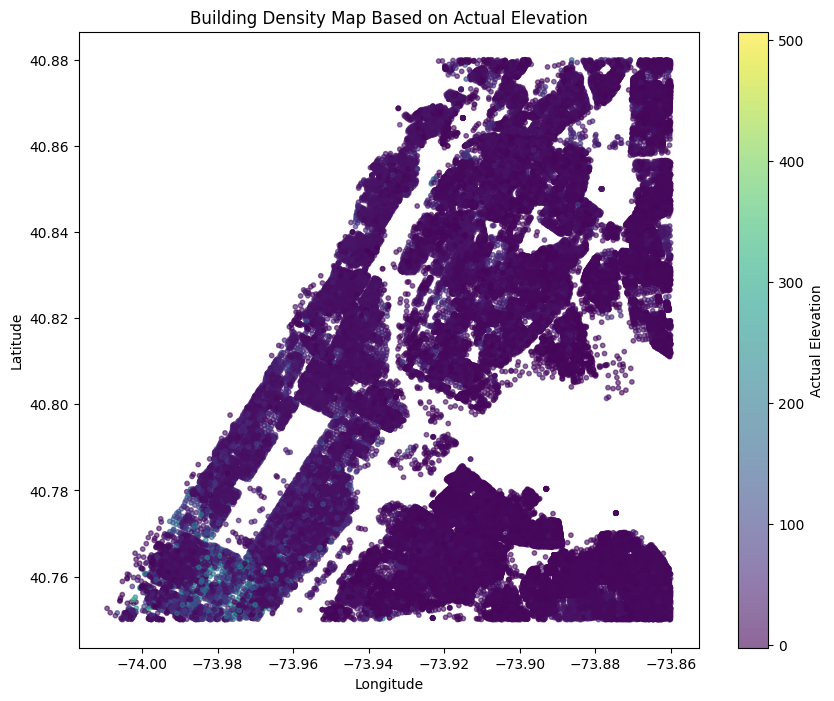

In [88]:
# Extract the longitude, latitude, and Actual Elevation columns
longitude = elevation_df_building['longitude']
latitude = elevation_df_building['latitude']
actual_elevation = elevation_df_building['Actual Elevation']

# Create a scatter plot with a color map based on Actual Elevation
plt.figure(figsize=(10, 8))
plt.scatter(longitude, latitude, c=actual_elevation, cmap='viridis', s=10, alpha=0.6)
plt.colorbar(label='Actual Elevation')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Building Density Map Based on Actual Elevation')
plt.show()

This is the total elevation without the difference of the z_grade:

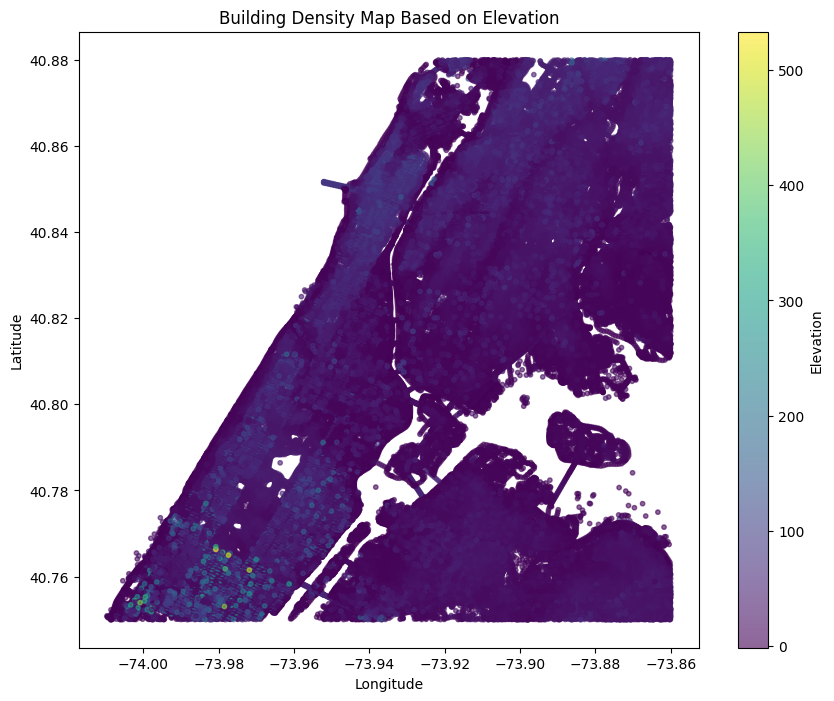

In [89]:
# Extract the geometry and elevation columns
geometry = filtered_elevation_2['geometry']
elevation_values = filtered_elevation_2['ELEVATION']

# Extract x and y coordinates from the geometry
x_coords = geometry.apply(lambda point: point.x)
y_coords = geometry.apply(lambda point: point.y)

# Create a scatter plot with a color map based on elevation values
plt.figure(figsize=(10, 8))
plt.scatter(x_coords, y_coords, c=elevation_values, cmap='viridis', s=10, alpha=0.6)
plt.colorbar(label='Elevation')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Building Density Map Based on Elevation')
plt.show()


In [90]:
filtered_elevation_2['FEAT_CODE'].value_counts()

FEAT_CODE
3020    109725
3000     68999
3010        56
Name: count, dtype: int64

1. Building elevation = 3020
2. Water Elevation = 3010
3. Spot/Bridge = 300

In [91]:
# Filter the data to only include instances where FEAT_CODE is 3020
filtered_elevation_2_building = filtered_elevation_2[filtered_elevation_2['FEAT_CODE'] == 3020]

# Find the maximum 10 elevation values
max_elevation_values = filtered_elevation_2_building['ELEVATION'].nlargest(10)
max_elevation_values

328107    533.468980
328108    487.652645
328106    473.274319
327960    437.319213
329747    423.419883
328054    370.426574
328087    354.486225
329748    342.311816
329705    341.700748
328109    338.670965
Name: ELEVATION, dtype: float64

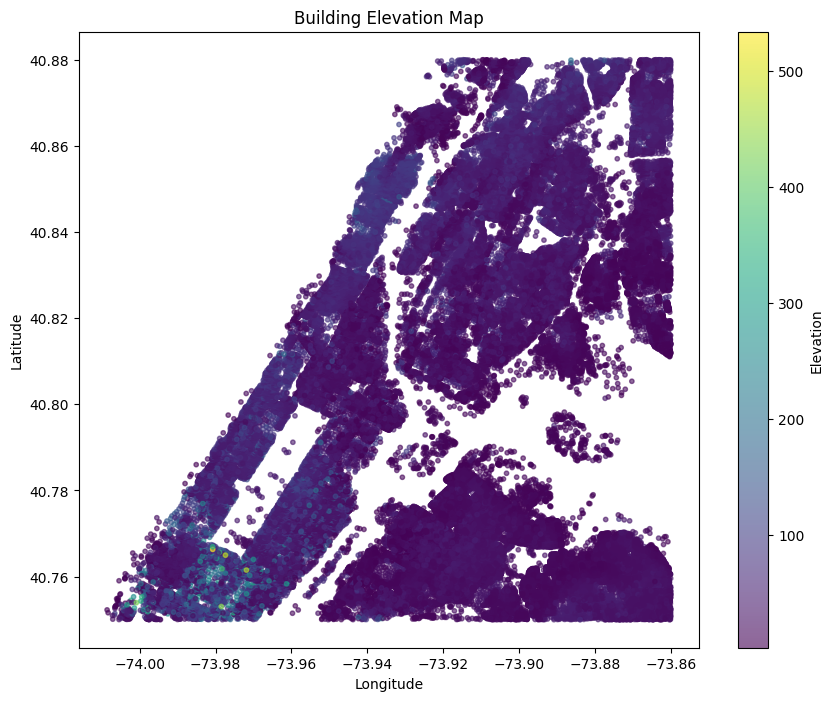

In [92]:
# Extract the geometry and elevation columns
geometry = filtered_elevation_2_building['geometry']
elevation_values = filtered_elevation_2_building['ELEVATION']

# Extract x and y coordinates from the geometry
x_coords = geometry.apply(lambda point: point.x)
y_coords = geometry.apply(lambda point: point.y)

# Create a scatter plot with a color map based on elevation values
plt.figure(figsize=(10, 8))
plt.scatter(x_coords, y_coords, c=elevation_values, cmap='viridis', s=10, alpha=0.6)
plt.colorbar(label='Elevation')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Building Elevation Map')
plt.show()

In [93]:
# Filter the data to only include instances where FEAT_CODE is 3020
filtered_elevation_2_water = filtered_elevation_2[filtered_elevation_2['FEAT_CODE'] == 3010]

# Find the maximum 10 elevation values
max_elevation_values = filtered_elevation_2_water['ELEVATION'].nlargest(10)
max_elevation_values

441435    44.137141
290739    37.155513
286978    32.398295
489046    31.607720
485379    31.223787
485443    30.712118
489048    30.551902
489045    29.594068
406703    27.499443
408128    26.542389
Name: ELEVATION, dtype: float64

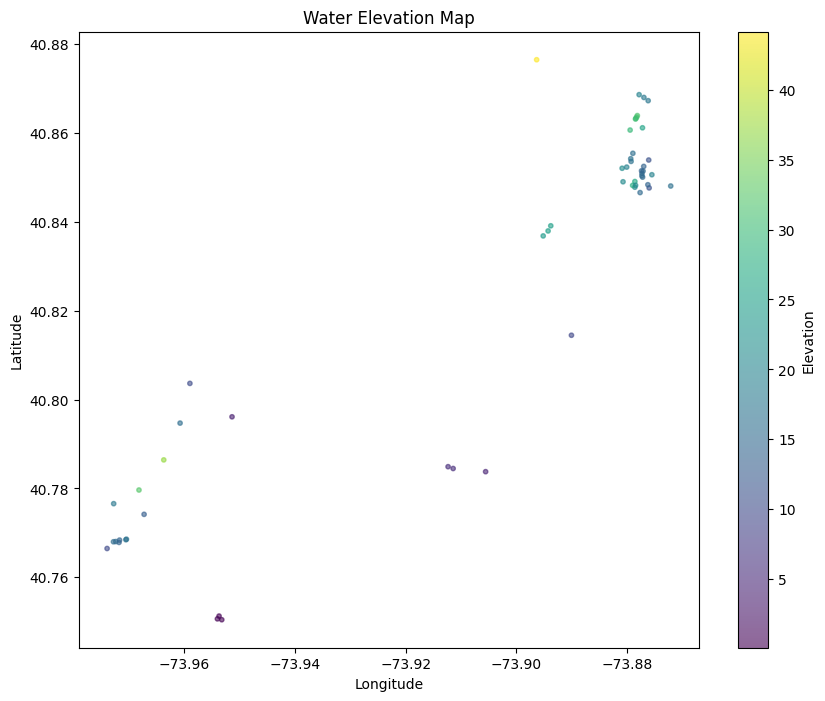

In [94]:
# Extract the geometry and elevation columns
geometry = filtered_elevation_2_water['geometry']
elevation_values = filtered_elevation_2_water['ELEVATION']

# Extract x and y coordinates from the geometry
x_coords = geometry.apply(lambda point: point.x)
y_coords = geometry.apply(lambda point: point.y)

# Create a scatter plot with a color map based on elevation values
plt.figure(figsize=(10, 8))
plt.scatter(x_coords, y_coords, c=elevation_values, cmap='viridis', s=10, alpha=0.6)
plt.colorbar(label='Elevation')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Water Elevation Map')
plt.show()

In [95]:
# Filter the data to only include instances where FEAT_CODE is 3000
filtered_elevation_2_other = filtered_elevation_2[filtered_elevation_2['FEAT_CODE'] == 3000]

# Find the maximum 10 elevation values
max_elevation_values = filtered_elevation_2_other['ELEVATION'].nlargest(10)
max_elevation_values

324913    86.354245
324914    86.112337
324911    85.895803
324912    85.666553
324909    85.655010
313891    85.587372
324916    85.524273
324907    85.385497
324910    85.355482
324915    85.231840
Name: ELEVATION, dtype: float64

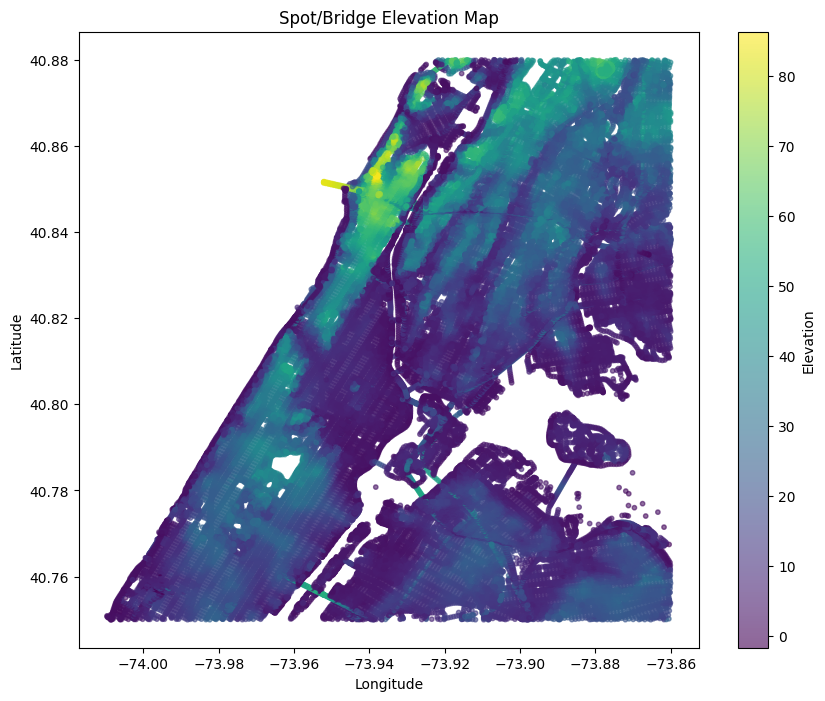

In [96]:
# Extract the geometry and elevation columns
geometry = filtered_elevation_2_other['geometry']
elevation_values = filtered_elevation_2_other['ELEVATION']

# Extract x and y coordinates from the geometry
x_coords = geometry.apply(lambda point: point.x)
y_coords = geometry.apply(lambda point: point.y)

# Create a scatter plot with a color map based on elevation values
plt.figure(figsize=(10, 8))
plt.scatter(x_coords, y_coords, c=elevation_values, cmap='viridis', s=10, alpha=0.6)
plt.colorbar(label='Elevation')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spot/Bridge Elevation Map')
plt.show()

### City Map:

In [97]:
city_map

the_geom        Borough  \
0      POINT (-74.08912148057911 40.58414256104758)  Staten Island   
1      POINT (-74.01082340300863 40.60670076791827)       Brooklyn   
2      POINT (-73.9834673989941 40.771135766460304)      Manhattan   
3      POINT (-73.95775745966317 40.60098588903353)       Brooklyn   
4      POINT (-74.00987373255226 40.62467900128834)       Brooklyn   
...                                             ...            ...   
1119   POINT (-73.84886886199779 40.68814090860431)            NaN   
1120   POINT (-73.83905987014855 40.68624007019814)         Queens   
1121   POINT (-73.84577280190129 40.64790246685461)         Queens   
1122  POINT (-73.85826364890585 40.678123231557706)         Queens   
1123   POINT (-73.84387143153143 40.57758111066364)         Queens   

              Feat_Type                            OfficialNM  \
0     Intersection name                                   NaN   
1     Intersection name                                   NaN   
2     Intersection name                                   NaN   
3     Intersection name                                   NaN   
4           Corner name                                   NaN   
...                 ...                                   ...   
1119                NaN  Crossing Guard Krystyna Naprawa Lane   
1120                NaN                   Camille Ferraro Way   
1121                NaN                    Karina Vetrano Way   
1122                NaN                    Mary Ann Carey Way   
1123                NaN                    Linda Ruscillo Way   

                                Honor_Name Old_Name ULURPCPNUM  Intro_NUM  \
0                    Vincent S. Chiara Way      NaN       none      471.0   
1                            Rita Blau Way      NaN       none      471.0   
2                     Jerome Robbins Place      NaN       none      471.0   
3                       Luther Mook Corner      NaN       none      471.0   
4       Charles J. Mauro 9/11 Memorial Way      NaN       none      471.0   
...                                    ...      ...        ...        ...   
1119  Crossing Guard Krystyna Naprawa Lane      NaN        NaN     1278.0   
1120                   Camille Ferraro Way      NaN        NaN     1278.0   
1121                    Karina Vetrano Way      NaN        NaN     1278.0   
1122                    Mary Ann Carey Way      NaN        NaN     1278.0   
1123                    Linda Ruscillo Way      NaN        NaN     1278.0   

      Intro_Year  IntroMonth  ...   LL_Type  LLEffectDT  \
0           2004          10  ...  Honorary  12/21/2004   
1           2004          10  ...  Honorary  12/21/2004   
2           2004          10  ...  Honorary  12/21/2004   
3           2004          10  ...  Honorary  12/21/2004   
4           2004          10  ...  Honorary  12/21/2004   
...          ...         ...  ...       ...         ...   
1119        2023           0  ...       NaN         NaN   
1120        2023           0  ...       NaN  12/20/2023   
1121        2023           0  ...       NaN  12/20/2023   
1122        2023           0  ...       NaN  12/20/2023   
1123        2023           0  ...       NaN  12/20/2023   

                                              LL_Limits Limits_ER Repealed  \
0     the intersection of Liberty Avenue and Mason A...       NaN       No   
1       the intersection of 16th Avenue and Bath Avenue       NaN       No   
2     the intersection of West 62nd Street and Colum...       NaN       No   
3     the intersection of Avenue T and East 14th Street       NaN       No   
4     the northeast corner of the intersection of 72...       NaN       No   
...                                                 ...       ...      ...   
1119  At the intersection of Atlantic Avenue and Woo...       NaN      NaN   
1120  At the intersection of 104th Street and 101st ...       NaN      NaN   
1121  At the intersection of 165th Avenue and 84th S...       NaN      NaN   
1122  A

In [98]:
# Convert the_geom to a GeoDataFrame
city_map['geometry'] = city_map['the_geom'].apply(wkt.loads)
gdf_geometry = gpd.GeoDataFrame(city_map, geometry='geometry')

# Filter the city_map data points within the bounding box
filtered_city_map = city_map[
    (city_map['geometry'].apply(lambda geom: geom.y) >= min_lat) &
    (city_map['geometry'].apply(lambda geom: geom.y) <= max_lat) &
    (city_map['geometry'].apply(lambda geom: geom.x) >= min_lon) &
    (city_map['geometry'].apply(lambda geom: geom.x) <= max_lon)
]

# Display the filtered data
filtered_city_map

the_geom    Borough  \
2      POINT (-73.9834673989941 40.771135766460304)  Manhattan   
11      POINT (-73.9769038148244 40.79018642955346)  Manhattan   
14       POINT (-73.9155805961025 40.8698743219405)  Manhattan   
22     POINT (-73.94467535484922 40.79157044966247)  Manhattan   
24     POINT (-73.91828807237636 40.86844292830504)  Manhattan   
...                                             ...        ...   
1103  POINT (-73.88679794486842 40.856422863957214)      Bronx   
1104  POINT (-73.88823687173827 40.854761526361244)      Bronx   
1110   POINT (-73.92450425224595 40.75625516552633)     Queens   
1114    POINT (-73.90331845372546 40.8627352828914)      Bronx   
1115   POINT (-73.90929033015216 40.76682797684663)     Queens   

              Feat_Type OfficialNM                      Honor_Name Old_Name  \
2     Intersection name        NaN            Jerome Robbins Place      NaN   
11    Intersection name        NaN  Arturo "Chico" O'Farrill Place      NaN   
14          Corner name        NaN          Donald J. McIntyre Way      NaN   
22    Intersection name        NaN              Osvaldo Vega Plaza      NaN   
24          Corner name        NaN                 Joe English Way      NaN   
...                 ...        ...                             ...      ...   
1103  Intersection name        NaN               Anne Bancroft Way      NaN   
1104  Intersection name        NaN            Teitel Brothers Lane      NaN   
1110  Intersection name        NaN           George S. Kaufman Way      NaN   
1114  Intersection name        NaN                Big Punisher Way      NaN   
1115  Intersection name        NaN       Pfc. Luke N. Gasparre Way      NaN   

     ULURPCPNUM  Intro_NUM  Intro_Year  IntroMonth  ...  LLEffectDT  \
2          none      471.0        2004          10  ...  12/21/2004   
11         none      471.0        2004          10  ...  12/21/2004   
14         none      471.0        2004          10  ...  12/21/2004   
22         none       22.0        2002           1  ...  07/29/2002   
24         none      471.0        2004          10  ...  12/21/2004   
...         ...        ...         ...         ...  ...         ...   
1103        NaN     2187.0        2021           1  ...   1/17/2021   
1104        NaN     2187.0        2021           1  ...   1/17/2021   
1110        NaN     2187.0        2021           1  ...   1/17/2021   
1114        NaN     2187.0        2021           1  ...   1/17/2021   
1115        NaN     2187.0        2021           1  ...   1/17/2021   

                                              LL_Limits  \
2     the intersection of West 62nd Street and Colum...   
11    the intersection of West 88th Street and West ...   
14    the northeast corner of the intersection of We...   
22    the intersection of East 106th Street and Thir...   
24    the northeast corner of the intersection of We...   
...                                                 ...   
1103  At the intersection of Arthur Avenue and 188th...   
1104  At the intersection of Arthur Avenue and 186th...   
1110  At the northwest corner of 35th Avenue and 36t...   
1114  At the intersection of Grand Concourse and Wes...   
1115  At the intersection of 43rd Street and 25th Av...   

                                  Limits_ER Repealed Repeal_DT Amended  \
2                                       NaN       No       NaN      No   
11                                      NaN       No       NaN      No   
14                                      NaN      Yes  5/9/2005      No   
22                                      NaN       No       NaN      No   
24                                      NaN       No       NaN      No   
...                                     ...      ...       ...     ...   
1103  Limit is the same as Carl Reiner Lane      NaN       NaN     NaN   
1104                                    NaN      NaN       NaN     NaN   
1110                                    NaN      NaN       NaN     NaN   

In [99]:
filtered_city_map['Feat_Type'] = filtered_city_map['Feat_Type'].replace(['Intersection name', 'Corner name', 'Square name'], ['Intersection', 'Corner', 'Square'])

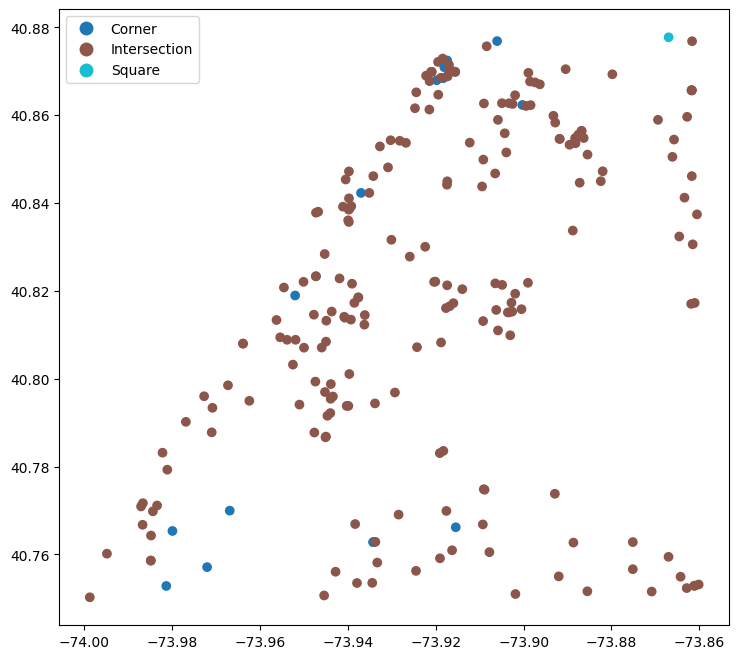

In [100]:
# Convert the_geom to a GeoDataFrame
filtered_city_map['geometry'] = filtered_city_map['the_geom'].apply(wkt.loads)
gdf_city = gpd.GeoDataFrame(filtered_city_map, geometry='geometry')

# Plot the GeoDataFrame with points colored by feat_type
gdf_city.plot(column='Feat_Type', legend=True, figsize=(10, 8))
plt.show()

### Socioeconomic Data:

Look at the different factors that could be used from the socioeconomic data. 

In [101]:
manhattan_boroughs

Unnamed: 0   Estimate
1                                    Total population  1634989.0
2                                                Male   773232.0
3                                              Female   861757.0
5                                       Under 5 years    82024.0
6                                        5 to 9 years    62937.0
..                                                ...        ...
92  Two races excluding Some other race, and Three...    33162.0
94                                Total housing units   866644.0
97                    Citizen, 18 and over population  1165063.0
98                                               Male   537317.0
99                                             Female   627746.0

[84 rows x 2 columns]

In [102]:
bronx_boroughs

Unnamed: 0   Estimate
1                                    Total population  1436785.0
2                                                Male   676440.0
3                                              Female   760345.0
5                                       Under 5 years   107454.0
6                                        5 to 9 years   100908.0
..                                                ...        ...
92  Two races excluding Some other race, and Three...    11655.0
94                                Total housing units   522401.0
97                    Citizen, 18 and over population   830543.0
98                                               Male   371623.0
99                                             Female   458920.0

[84 rows x 2 columns]

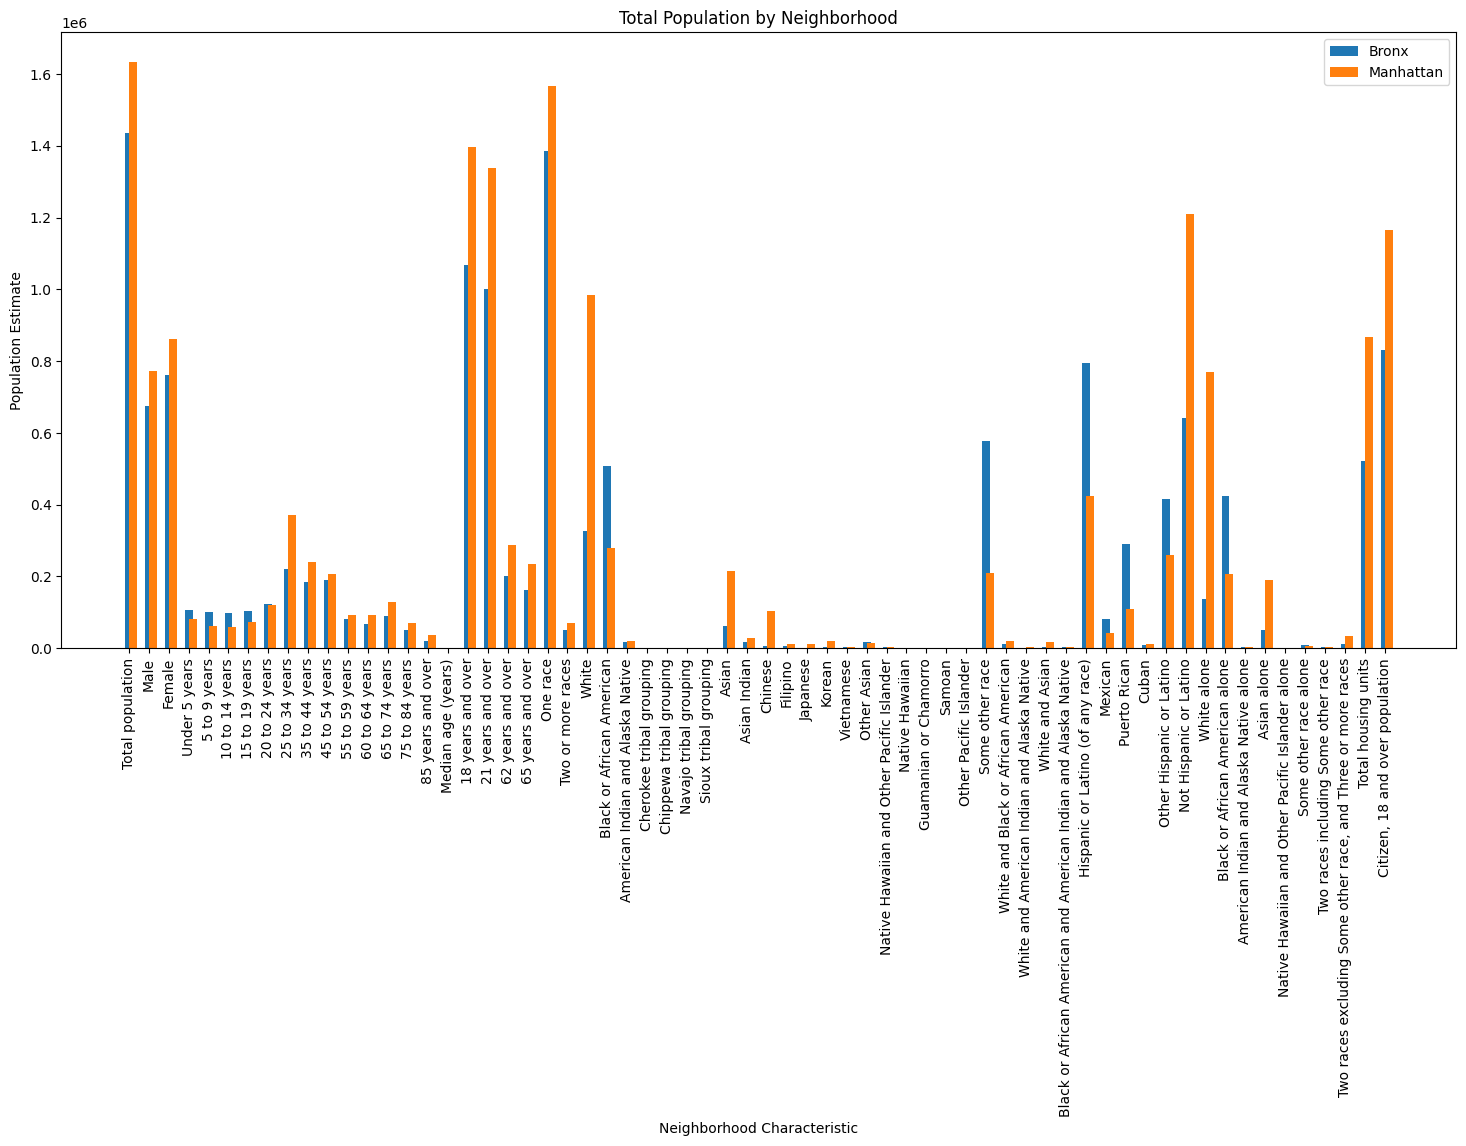

In [103]:
# Plot bar graph from the first column of each dataset stratified by Manhattan vs. Bronx
plt.figure(figsize=(18, 8))
width = 0.4
plt.bar(bronx_boroughs['Unnamed: 0'], bronx_boroughs['Estimate'], width=width, label='Bronx', align='center')
plt.bar(manhattan_boroughs['Unnamed: 0'], manhattan_boroughs['Estimate'], width=width, label='Manhattan', align='edge')
plt.xlabel('Neighborhood Characteristic')
plt.ylabel('Population Estimate')
plt.title('Total Population by Neighborhood')
plt.xticks(rotation=90)
plt.legend()
plt.show()

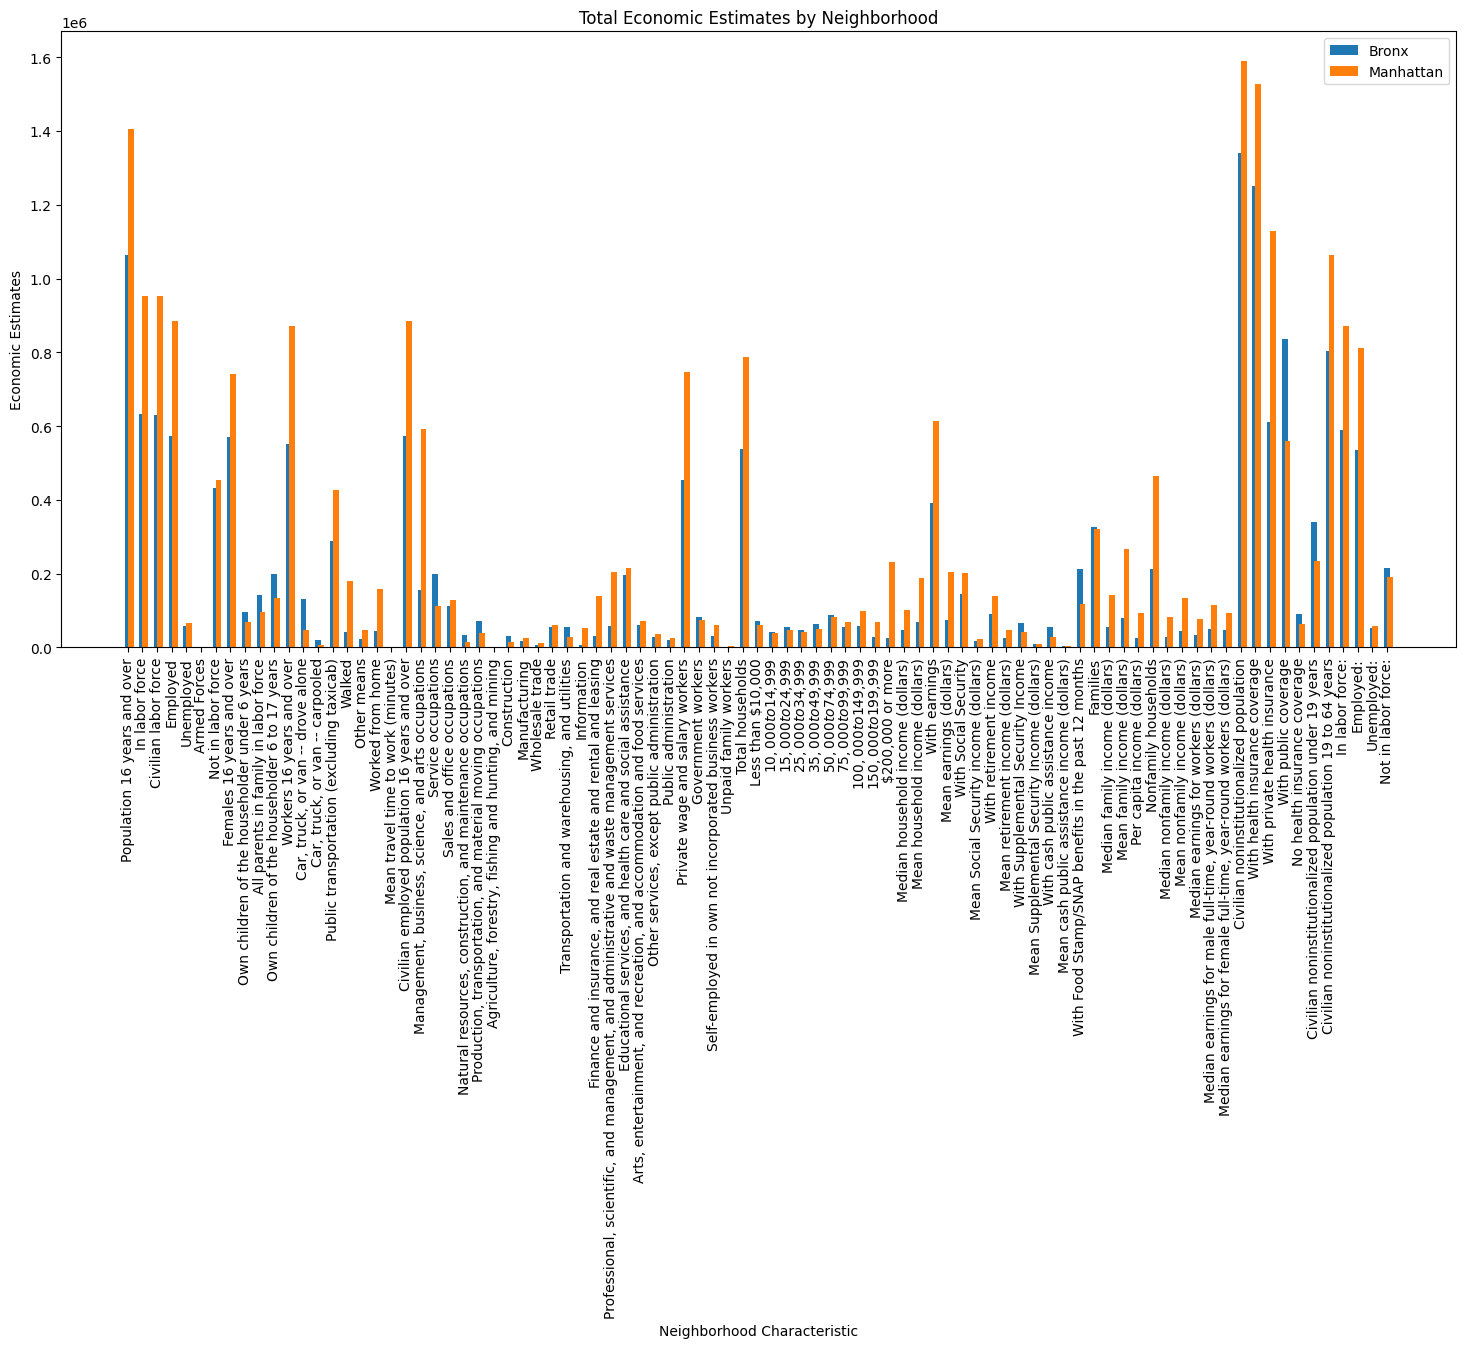

In [104]:
# Plot bar graph from the first column of each dataset stratified by Manhattan vs. Bronx
plt.figure(figsize=(18, 8))
width = 0.4
plt.bar(economic_bronx['Group'], economic_bronx['Estimate'], width=width, label='Bronx', align='center')
plt.bar(economic_manhattan['Group'], economic_manhattan['Estimate'], width=width, label='Manhattan', align='edge')
plt.xlabel('Neighborhood Characteristic')
plt.ylabel('Economic Estimates')
plt.title('Total Economic Estimates by Neighborhood')
plt.xticks(rotation=90)
plt.legend()
plt.show()

# Dataset:

Include all the important column features for the elevation, shorelines, and intersection points. This will potentially be used in the final model.
1. filtered_shoreline['geometry']
2. filtered_elevation['z_grade']
3. filtered_elevation_2_building['ELEVATION']
4. filtered_elevation_2_water['ELEVATION']
5. filtered_city_map['Feat_Type']

Include all the important column features for the socioeconomic data in relation to Bronx versus Manhattan.

We are going to cluster data now on location in the Clustering Notebook.